**Homework 1**

Author: HaoTang Wu, Cristina Zhang 

The dataset is sourced from https://archive.ics.uci.edu/dataset/320/student+performance. 

We filtered out the 'student-mat' data as the test dataset, resulting in a dataset with 395 rows and 33 columns. For this test, we will use the 'Mjob' column as the documents. We will then proceed to test using the five different classes we have implemented and imported below.

In [46]:
#Library Import
from Shingling import *
from CompareSet import *
from MinHashing import *
from CompareSignature import *
from LSH import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

In [47]:
path = os.path.dirname(os.getcwd())
data_path = os.path.join(path, 'student', 'student-mat.csv')
df = pd.read_csv(data_path, sep=';', header=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [48]:
documents = df['Mjob'].values
documents

array(['at_home', 'at_home', 'at_home', 'health', 'other', 'services',
       'other', 'other', 'services', 'other', 'teacher', 'services',
       'health', 'teacher', 'other', 'health', 'services', 'other',
       'services', 'health', 'teacher', 'health', 'teacher', 'other',
       'services', 'services', 'other', 'health', 'services', 'teacher',
       'health', 'services', 'teacher', 'other', 'other', 'other',
       'teacher', 'other', 'services', 'at_home', 'other', 'teacher',
       'services', 'services', 'other', 'other', 'other', 'health',
       'teacher', 'services', 'services', 'health', 'health', 'services',
       'other', 'other', 'services', 'teacher', 'other', 'services',
       'health', 'services', 'other', 'teacher', 'services', 'teacher',
       'other', 'services', 'health', 'other', 'other', 'other', 'other',
       'other', 'other', 'teacher', 'teacher', 'other', 'other',
       'at_home', 'other', 'other', 'services', 'services', 'other',
       'services', 'a

**Test similaritis through hashed shingling**

This code computes the Jaccard similarity between each pair of documents in the dataset based on their shingle sets and stores the results in the similarities list. The Jaccard similarity indicates the proportion of shared shingles between each document pair, which can be used as a measure of document similarity.


In [53]:
similarities = []

shingle_generator = Shingle(k=5)
shingle_set = list(map(lambda document: shingle_generator.shingling(document), documents))
start_time = time.time()
for i in range(documents.shape[0] - 1):
  token_1 = shingle_set[i]
  for j in range(i + 1, documents.shape[0]):
    token_2 = shingle_set[j]
    similarities.append(CompareSet.jaccard_similarity(token_1, token_2))
end_time = time.time()
print("Runtime: {:.4f} ms".format(end_time - start_time))

high_similarity_count = sum(1 for similarity in similarities if similarity > 0.8)
# Print the count of high similarity pairs
print("Number of similarities > 0.8:", high_similarity_count)

Runtime: 0.0506 ms
Number of similarities > 0.8: 19048


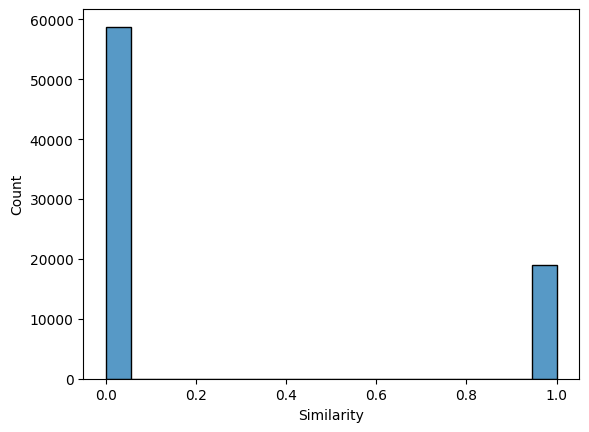

In [50]:
sns.histplot(x=similarities)
plt.xlabel("Similarity")
plt.show()

**Test similarities through MinHashing**

MinHash: MinHash is a technique used to create a compact signature (a list of integers) for a set, such as a set of document shingles. The MinHash signature approximates the similarity between sets, where the similarity between MinHash signatures of two sets reflects their Jaccard similarity. This allows efficient similarity comparison without needing to process the entire set.

CompareSignature: CompareSignature takes two MinHash signatures and calculates the fraction of components (integers) in which they match. This fraction is used as an estimate of the Jaccard similarity between the original sets, enabling quick similarity comparisons between sets based on their MinHash signatures.

Runtime: 0.5617 ms
Number of similarities > 0.8: 19048


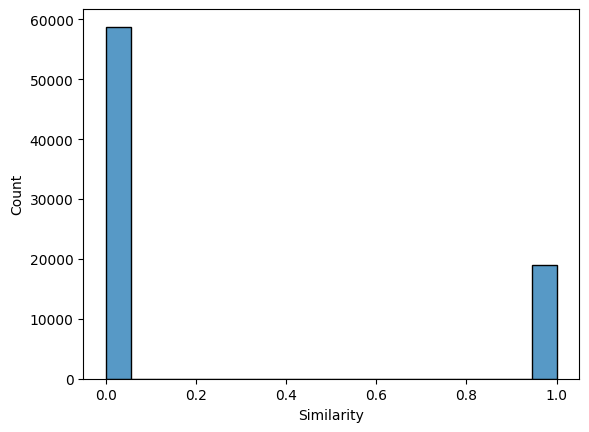

In [ ]:
similarities = []
all_signatures = []

# Generate MinHash signatures (this part is not included in timing)
shingle_set = list(map(lambda document: shingle_generator.shingling(document), documents))
minHash = MinHashing(n=10)
all_signatures = [minHash.compute_signature(shingle) for shingle in shingle_set]

# Timing only the comparison part
similarities = []
start_time = time.time()
for i in range(len(all_signatures) - 1):
    signature_1 = all_signatures[i]
    for j in range(i + 1, len(all_signatures)):
        signature_2 = all_signatures[j]
        similarities.append(CompareSignatures.estimate_similarity(signature_1, signature_2))
end_time = time.time()
print("Runtime: {:.4f} ms".format(end_time - start_time))

high_similarity_count = sum(1 for similarity in similarities if similarity > 0.8)
# Print the count of high similarity pairs
print("Number of similarities > 0.8:", high_similarity_count)

sns.histplot(x=similarities)
plt.xlabel("Similarity")
plt.show()


**Test similar pair through LSH and its runtime**

LSH: Locality-Sensitive Hashing (LSH) identifies pairs of items (such as documents) with high similarity by hashing MinHash signatures into "bands." If two signatures match in a sufficient number of bands, they are considered a candidate pair. LSH reduces the number of comparisons needed to find similar items, making it more efficient on large datasets.

Runtime: Compared with three different methods, we can see LSH has the quickest  runtime.

In [55]:

lsh = LSH(band=5, threshold=0.8)

 # Test runtime
start_time = time.time()
similar_pairs = lsh.find_similar_pairs(all_signatures)
#print(len(similar_pairs))
end_time = time.time()

print("Found similar pairs of documents:", similar_pairs)
print("Runtime: {:.4f} ms".format(end_time - start_time))



Found similar pairs of documents: [(206, 217), (137, 383), (211, 332), (271, 383), (104, 206), (250, 260), (183, 270), (35, 106), (95, 157), (136, 158), (315, 389), (29, 32), (153, 327), (287, 327), (306, 340), (171, 381), (245, 330), (56, 165), (264, 343), (97, 166), (350, 383), (9, 90), (262, 270), (28, 332), (50, 91), (14, 168), (138, 204), (220, 273), (206, 338), (321, 325), (13, 209), (44, 276), (151, 173), (118, 225), (159, 263), (49, 391), (71, 150), (16, 214), (104, 327), (197, 289), (62, 330), (301, 383), (254, 271), (345, 389), (111, 222), (116, 337), (124, 161), (69, 225), (336, 340), (36, 48), (160, 343), (201, 381), (148, 289), (159, 384), (44, 168), (30, 233), (71, 271), (90, 284), (16, 335), (169, 348), (34, 389), (122, 236), (153, 340), (213, 391), (120, 163), (254, 392), (328, 341), (39, 238), (92, 330), (226, 330), (312, 333), (78, 166), (372, 384), (97, 179), (138, 217), (185, 292), (50, 104), (69, 117), (160, 235), (8, 107), (154, 161), (99, 225), (333, 392), (159, 